In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lbg_forecast.population_model as pop
import lbg_forecast.noise as noise
import lbg_forecast.selection as sel
import lbg_forecast.nz_sim as nz
import lbg_forecast.lyalpha as ly
import os
from getdist import plots, MCSamples

In [2]:
def numpy_to_mcsamples(array, names, label):
    "convenience function used for plotting using getdist"
    samples = np.copy(array)
    samples[:, -1] = np.log10(samples[:, -1])
    samples[:, 8] = np.log10(samples[:, 8])
    return MCSamples(samples=samples, names=names, label=label)

def plot_samples(all, u, g, r):
    "plot triangle plot for sps parameters"
    plotter = plots.get_subplot_plotter()
    names = pop.sps_parameter_names()#["zred", "logzsol", "dust1", "dust2", "dust_index", 
            #          "igm_factor", "gas_logu", "logfagn", "agn_tau",
            #           "logf1", "logf2", "logf3", "logf4", "logf5","logf6", "logmass"]
    
    s1 = numpy_to_mcsamples(all, names, label = "global population")
    s2 = numpy_to_mcsamples(u, names, label = "u-dropouts")
    s3 = numpy_to_mcsamples(g, names, label = "g-dropouts")
    s4 = numpy_to_mcsamples(r, names, label = "r-dropouts")
    
    plotter.triangle_plot([s1, s2, s3, s4], Filled=False, contour_lws=2, colors=["black", "blue", "red", "green"], contour_colors=["black", "blue", "red", "green"])

In [3]:
#counts how many individual files of a given type there are (i.e. number of simulation runs)
files = os.listdir("simulation_data")
run_count = 0
for file in files:
    if("sps_parameters" in file):
        run_count+=1
print(run_count)

#loads files
sps_parameters = []
photometry = []
spectra = []
for run in range(run_count):
    sps_parameters.append(np.load("simulation_data/sps_parameters_"+str(run)+".npy"))
    photometry.append(np.load("simulation_data/simulated_photometry_"+str(run)+".npy"))
    spectra.append(np.load("simulation_data/spectra_"+str(run)+".npy"))
sps_parameters = np.vstack(sps_parameters)
photometry = np.vstack(photometry)
spectra = np.vstack(spectra)
wavelengths = np.load("simulation_data/wavelengths_0.npy")

10200


In [7]:
np.save("training_data/photometry_"+str(photometry.shape[0])+".npy", photometry)
np.save("training_data/sps_parameters_"+str(photometry.shape[0])+".npy", sps_parameters)
np.save("training_data/spectra_"+str(photometry.shape[0])+".npy", spectra)
np.save("training_data/wavelengths_0.npy", wavelengths)
photometry.shape

In [5]:
sources = noise.get_noisy_magnitudes(sps_parameters, photometry, random_state=42)
colours = sel.colours(sources)
uparams, gparams, rparams = nz.apply_cuts(colours, return_all_params=True)
uparams.shape

(164937, 17)

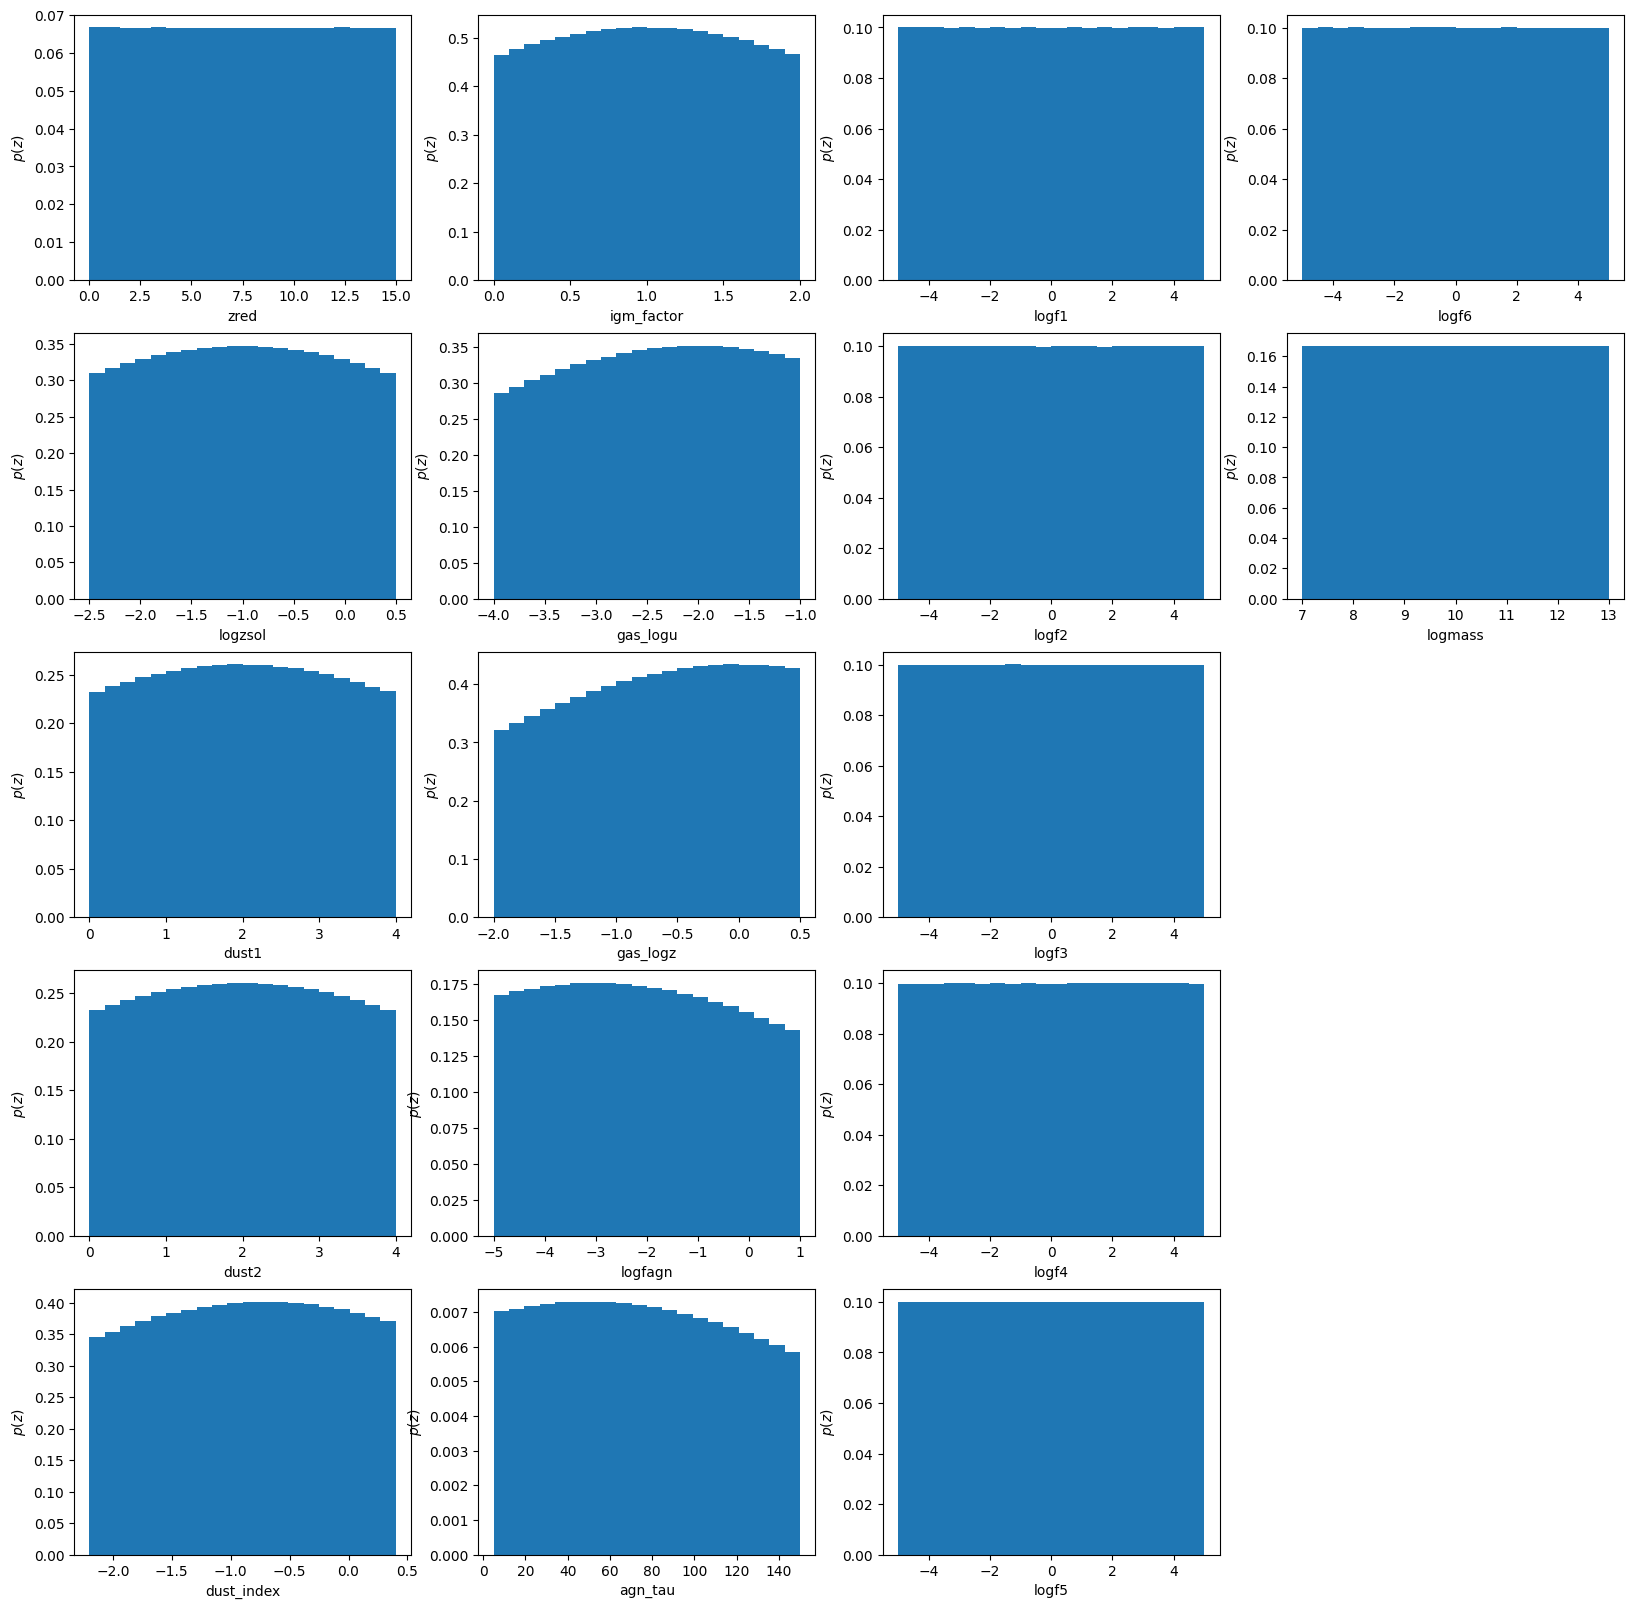

In [5]:
pop.plot_galaxy_population(sps_parameters)

(array([2.02495415e-03, 1.75496026e-03, 6.74984716e-03, 2.88893458e-02,
        4.04990830e-02, 1.70096148e-02, 4.31990218e-03, 4.31990218e-03,
        1.74146057e-02, 1.03947646e-02, 3.91491135e-03, 2.15995109e-03,
        1.88995720e-03, 1.75496026e-03, 2.15995109e-03, 1.67396210e-02,
        4.54939698e-02, 4.15790585e-02, 2.98343244e-02, 2.11945201e-02,
        1.86295782e-02, 1.33646974e-02, 1.33646974e-02, 1.17447341e-02,
        1.87645751e-02, 4.91388873e-02, 1.71446118e-01, 3.68811649e-01,
        6.33135663e-01, 8.87874895e-01, 1.02719174e+00, 8.74915189e-01,
        6.33135663e-01, 3.64221753e-01, 1.60511365e-01, 1.04352637e-01,
        6.52035236e-02, 4.06340799e-02, 7.08733952e-02, 1.14612405e-01,
        1.48091647e-01, 1.59566387e-01, 1.63346301e-01, 1.96555549e-01,
        1.03272662e-01, 1.30947035e-02, 4.58989607e-03, 1.07997555e-03,
        2.69993886e-04, 4.04990830e-04, 6.74984716e-04, 2.69993886e-04,
        5.39987773e-04, 6.74984716e-04, 2.69993886e-04, 4.049908

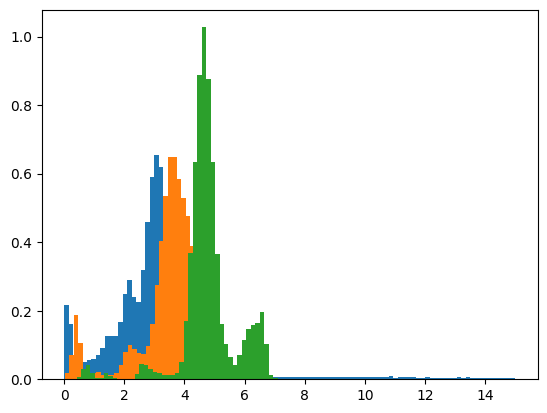

In [10]:
bins = 100
plt.hist(uparams[:, 0], bins=bins, density=True)
plt.hist(gparams[:, 0], bins=bins, density=True)
plt.hist(rparams[:, 0], bins=bins, density=True)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


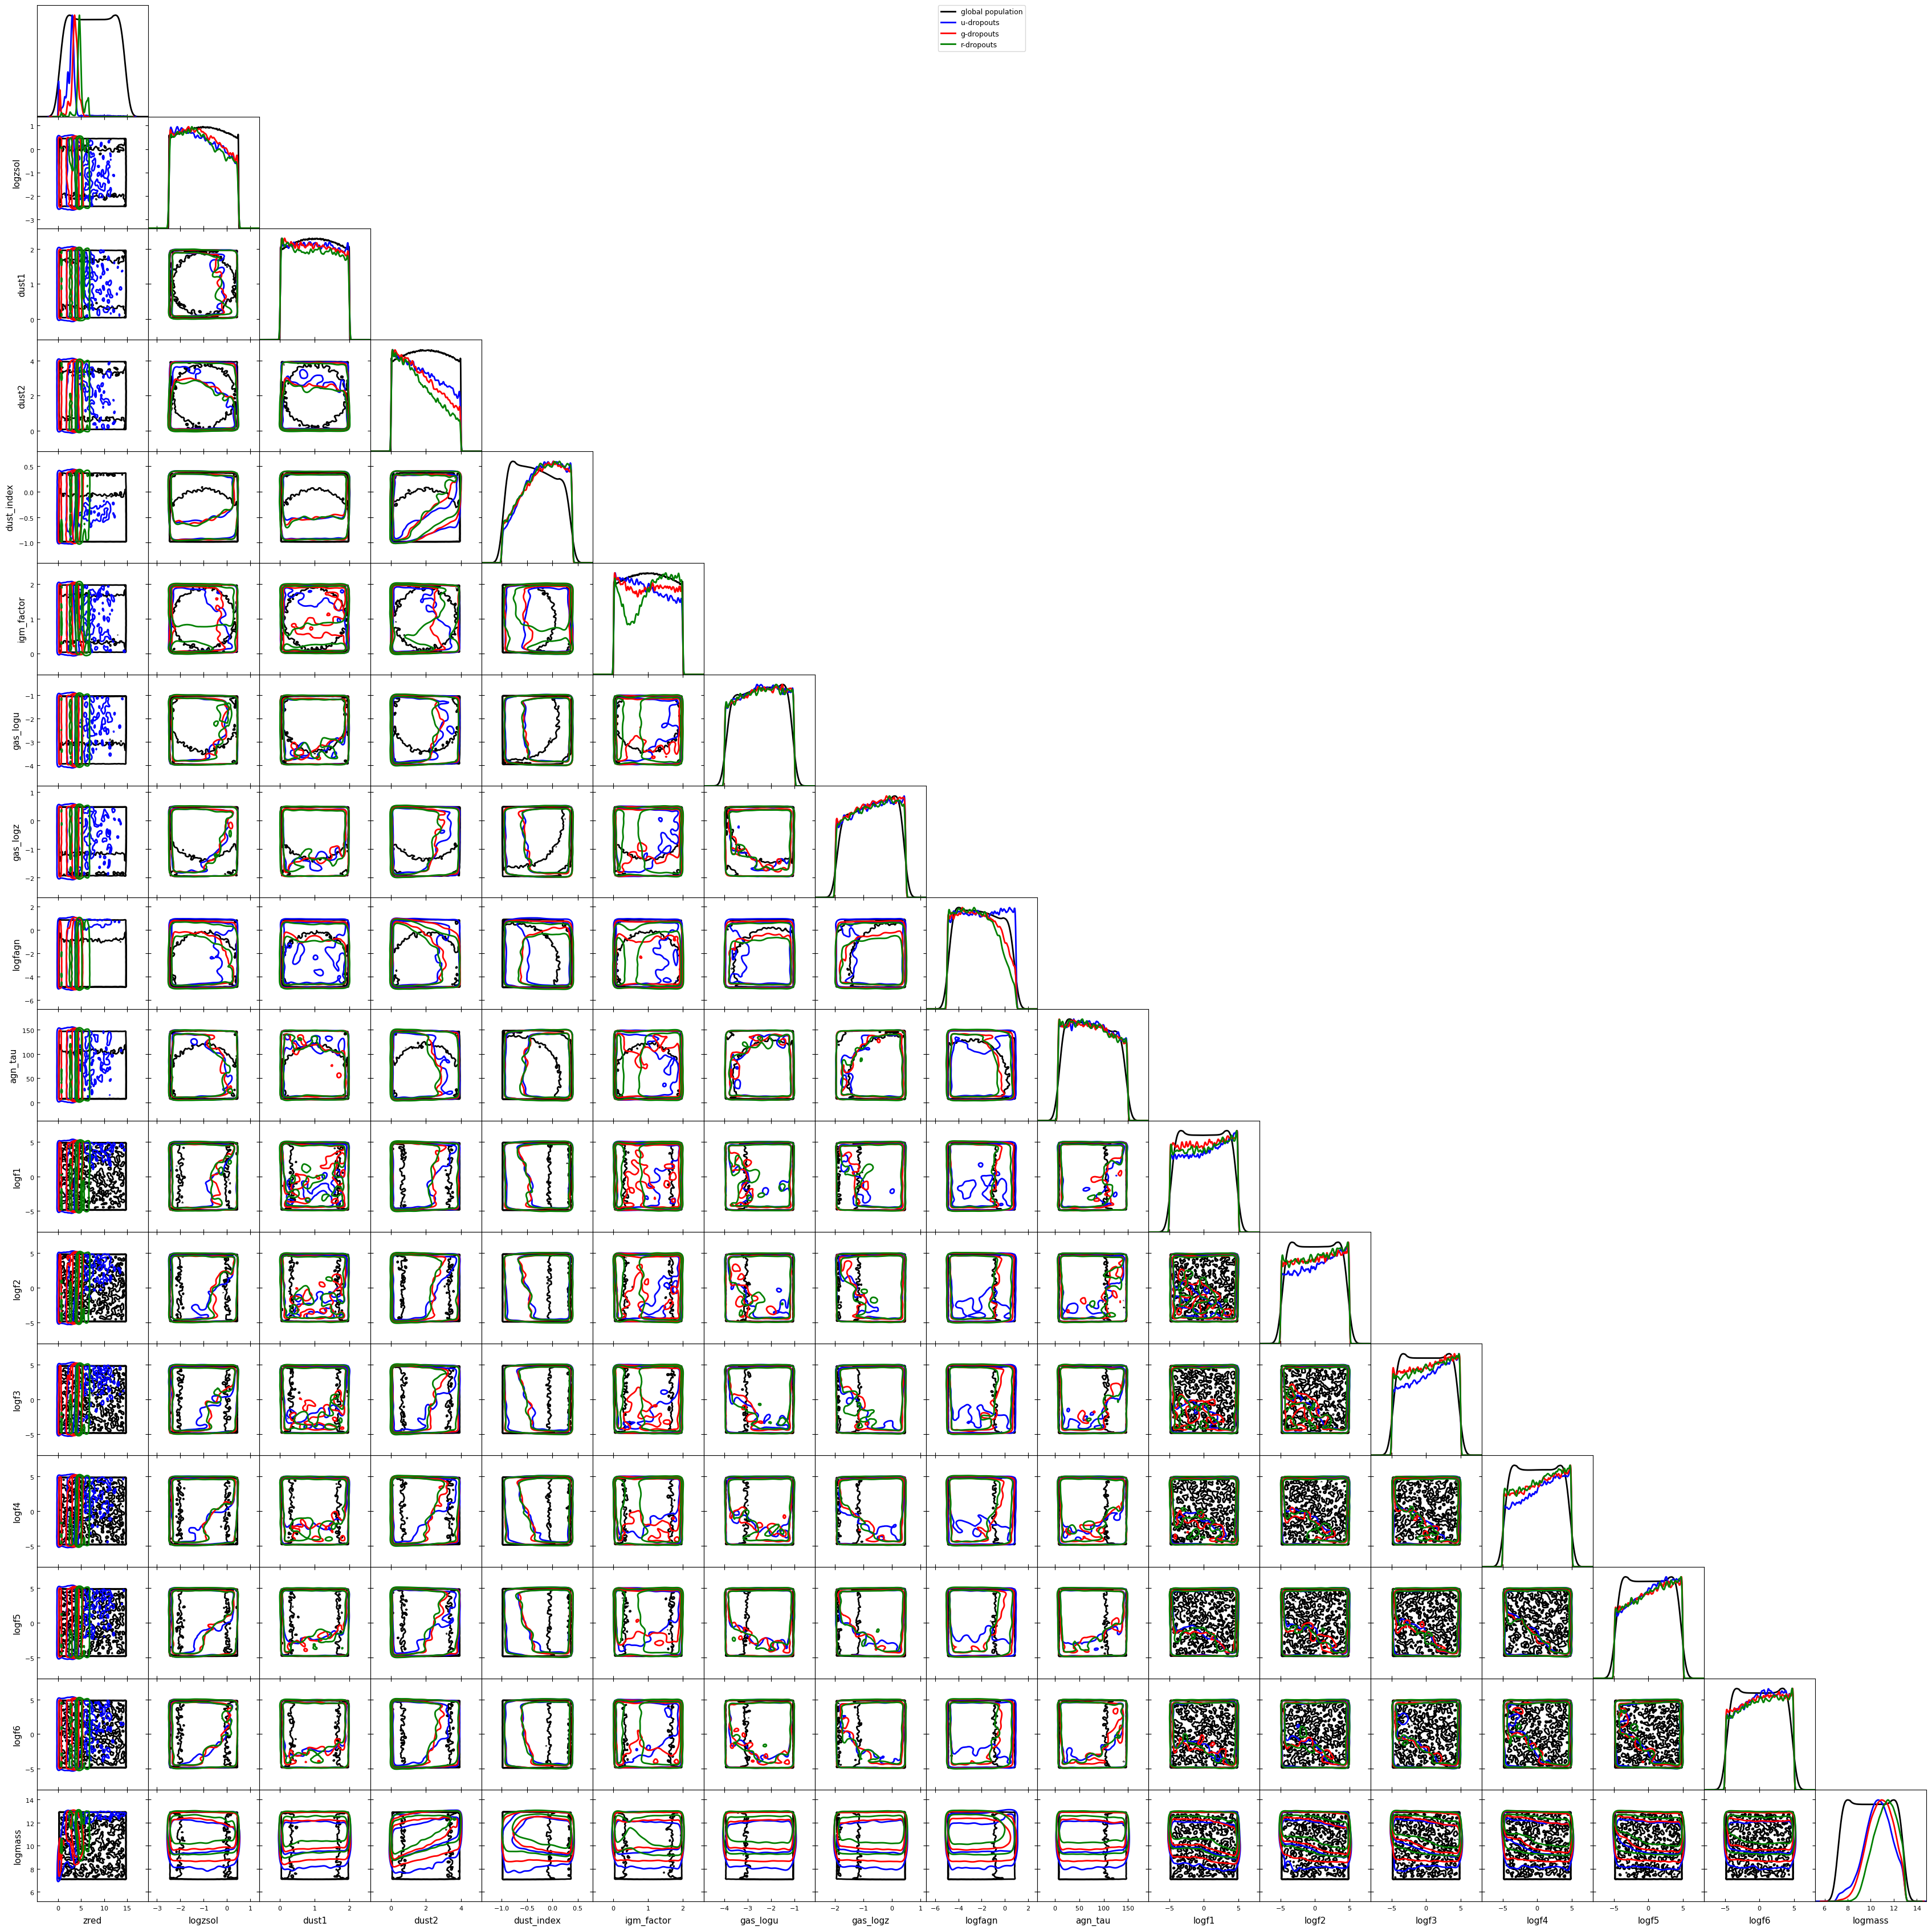

In [8]:
plot_samples(sps_parameters, uparams, gparams, rparams)